<img src="Images/Logo.png" alt="Logo NSI" style="float:right">

<h1 style="text-align:center">Chapitre 10 : Algorithmes de tri</code></h1>

## Intérêts
Supposons que l'on cherche à déterminer si deux tableaux d'entiers contiennent exactement les mêmes, avec , pour chacun, le même nombre d'occurrences. Si les tableaux sont déjà triés, la comparaison devient beaucoup plus simple.

In [ ]:
def compare_tableaux(t, u):
    """compare deux tableaux de même longueur, supposés triés"""
    for i in range(len(t)):
        if t[i] != u[i]:
            return False
    return True

Le tri possède de nombreuses applications.  
Une fois que les données sont triées, il est très rapide de déterminer la médiane, si une valeur donnée est présente, la valeur la plus fréquente, ...  
Le tri est également un ingrédient de base de nombreux algorithmes.

## Tri par sélection
<center><img src="Images/SelectionSort.gif" alt="Tri par sélection" width="400"></center>

Le **tri par sélection** parcourt le tableau de la gauche vers la droite, en maintenant sur la gauche une partie déjà triée et à sa place définitive :

        +-----------------------+--------------------------------+
        | déjà trié             |                pas encore trié |
        +-----------------------+--------------------------------+

A chaque étape :
* On cherche le plus petit élément dans la partie droite, non triée
* On échange cet élément avec l'élément le plus à gauche de la partie non triée.

Par construction, la partie gauche déjà triée ne contient que des éléments inférieurs ou égaux à ceux de la partie droite restant à trier.

On commence par se donner une fonction `echange` pour échanger les deux éléments d'un tableau `t` situés aux indices `i` et `j`.

In [ ]:
def echange(t, i, j):
    tmp = t[i]
    t[i] = t[j]
    t[j] = tmp

Pour réaliser le tri pas insertion, on va utiliser une boucle parcourant toutes les cases du tableau, de la gauche vers la droite.
```python
for i in range(len(t)):
```

La partie déjà examinée du tableau est supposée déjà triée.

        0                        i
        +-----------------------+--------------------------------+
      t | éléments triés        |                ...             |
        +-----------------------+--------------------------------+

L'indice `i` n'est pas encore examiné et ne fait donc pas partie des éléments déjà triés.  
En particulier, à le première itération de la boucle, `i` vaut `0` et la partie gauche est donv vide.

En réalité, la partie gauche déjà triée contient des éléments tous plus petits que la partie droite non encore triée.

        0                        i
        +-----------------------+--------------------------------+
      t | éléments triés        | éléments plus grands non triés |
        +-----------------------+--------------------------------+

C'est l'**invariant de boucle** : les `i` premiers éléments du tableau coïncident avec les `i` premiers éléments du tableau trié.

Il faut maintenant chercher l'**indice** du plus petit élément dans la partie droite :
```python
m = i
for j in range(i + 1, len(t)):
    if t[j] < t[m]:
        m = j
```

In [1]:
def echange(t, i, j):
    tmp = t[i]
    t[i] = t[j]
    t[j] = tmp
    
def tri_par_selection(t):
    """trie le tableau t dans l'ordre croissant"""
    for i in range(len(t)):
        # invariant : t[0..i[ est trié et <= à t[i..[
        # on cherche le minimum de t[i..[
        idx_min = i
        for j in range(i + 1, len(t)):
            if t[j] < t[idx_min]:
                idx_min = j
        echange(t, i, idx_min)

### Efficacité
On peut se demander si c'est une méthode de tri efficace.

In [2]:
# Récupération des données
from time import perf_counter
from random import randint

# On utilise une fonction pour générer des tableaux aléatoire de taille n
def tableau_aleatoire(n):
    """Renvoie un tableau d'entiers aléatoires de taille n"""
    tab = [0] * n
    for i in range(n):
        tab[i] = randint(1, n)
    return tab

nb_points = 5 # nb de points à tracer
abscisses = [0] * nb_points
ordonnees = [0] * nb_points
taille = 1_000

for i in range(nb_points):
    abscisses[i] = taille
    tableau = tableau_aleatoire(taille)
    debut = perf_counter()
    tri_par_selection(tableau)
    fin = perf_counter()
    ordonnees[i] = fin - debut
    taille = taille * 2

In [3]:
# On peut afficher les résultats
for i in range(nb_points):
    print("Il faut", round(ordonnees[i],5), "s pour trier un tableau de taille", abscisses[i])

Il faut 0.05493 s pour trier un tableau de taille 1000
Il faut 0.20659 s pour trier un tableau de taille 2000
Il faut 0.56472 s pour trier un tableau de taille 4000
Il faut 2.28509 s pour trier un tableau de taille 8000
Il faut 12.72264 s pour trier un tableau de taille 16000


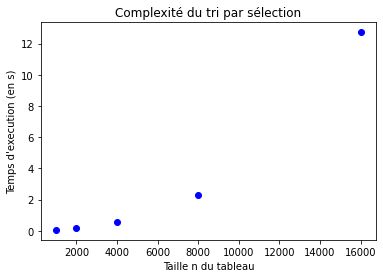

In [4]:
# On trace les nuages de points
import matplotlib.pyplot as plt

plt.figure("Complexite temporelle")
plt.title('Complexité du tri par sélection')
plt.xlabel("Taille n du tableau")
plt.ylabel("Temps d'execution (en s)")  
plt.plot(abscisses, ordonnees, 'bo')
plt.show()

On observe que les temps de calcul n'augmentent pas proportionnellement à la taille du tableau.

Si on s'interesse au nombre de calculs élémentaires (on ne comptabilise ici que les comparaisons), on constate que l'on en a :
$$n+(n-1)+(n-2)+ ... + 1$$
Or cette somme vaut $\dfrac{n(n+1)}{2}$, ce qui explique les temps de calcul observés.  
On parle de complexité **quadratique**.

## Tri par insertion
<center><img src="Images/InsertionSort.gif" alt="Tri par insertion" width="400"></center>
Un autre algorithme de tri, souvent utilisé par les joueurs de cartes, est le **tri par insertion**.  
Il suit le même principe que le tri par sélection, en parcourant le tableau de la gauche vers la droite et en maintenant une partie déjà triée sur la gauche.

        +-------------------------+------------------------------+
        | déjà trié               |              pas encore trié |
        +-------------------------+------------------------------+

Plutôt que de chercher la plus petite valeur dans la partie non encore triée, le tri par insertion va insérer la première valeur non encore triée (la valeur la plus à gauche dans la partie droite non triée), dans la partie gauche déjà triée.  
Pour cela, on va décaler d'une case vers la droite tous les éléments déjà triés qui sont plus grands que la valeur à insérer, puis déposer cette dernière dans la case ainsi libérée.

<div style="text-align: center">
<a href="https://jdolivet.github.io/NSI-Cours/Premi%C3%A8re/Sites/methodes-tri/Tri_insertion.html">
   <img border="0" alt="Tri par insertion" src="Images/Tri-insertion.png" > 
</a>
</div>

On commence par écrire une fonction `insere` qui réalise l'insertion d'une valeur `v` dans la partie du tableau `t[0],..,t[i]` en supposant que les valeurs `t[0],..,t[i-1]` son triées.

        0                          i
        +-------------------------+-+----------------------------+
      t | éléments triés          |v|            ...             |
        +-------------------------+-+----------------------------+

        0             j            i
        +------------+-+------------+----------------------------+
      t |elts triés  |v|  elts triés|            ...             |
        +------------+-+------------+----------------------------+

In [ ]:
def insere(t, i, v):
    """insère v dans t[0..i[ supposé trié"""
    j = i
    while j > 0 and t[j - 1] > v:
        t[j] = t[j - 1]
        j = j - 1
    t[j] = v

Il suffit maintenant d'insérer successivement toutes les valeurs du tableau avec la fonction `insere`, en procédant de la gauche vers la droite

In [9]:
def insere(t, i, v):
    """insère v dans t[0..i[ supposé trié"""
    j = i
    while j > 0 and t[j - 1] > v:
        t[j] = t[j - 1]
        j = j - 1
    t[j] = v
    
def tri_par_insertion(t):
    """trie le tableau t dans l'ordre croissant"""
    for i in range(1, len(t)):
        # invariant : t[0..i[ est trié
        insere(t, i, t[i])

### Efficacité
Dans le pire des cas, le tri par insertion n'est pas meilleur que le tri par sélection.  
Il faut alors $1+2+ ... +(n-2)+(n-1)$ opérations pour trier un tableau de taille `n`.  
En revanche, il existe des situations ou le tri par insertion est meilleur que le tri par sélection. 

Le tri par sélection exécute **exactement** $\dfrac{n(n+1)}{2}$ opérations, alors que le tri par insertion nécessite de, **au plus**, $\dfrac{n(n+1)}{2}$ opérations.

In [15]:
# Récupération des données
from time import perf_counter
from random import randint

# On utilise une fonction pour générer des tableaux aléatoire de taille n
def tableau_aleatoire(n):
    """Renvoie un tableau d'entiers aléatoires de taille n"""
    tab = [0] * n
    for i in range(n):
        tab[i] = randint(1, n)
    return tab

nb_points = 5 # nb de points à tracer
abscisses = [0] * nb_points
ordonnees = [0] * nb_points
taille = 1_000

for i in range(nb_points):
    abscisses[i] = taille
    tableau = tableau_aleatoire(taille)
    debut = perf_counter()
    tri_par_insertion(tableau)
    fin = perf_counter()
    ordonnees[i] = fin - debut
    taille = taille * 2

In [16]:
# On peut afficher les résultats
for i in range(nb_points):
    print("Il faut", round(ordonnees[i],5), "s pour trier un tableau de taille", abscisses[i])

Il faut 0.07045 s pour trier un tableau de taille 1000
Il faut 0.27933 s pour trier un tableau de taille 2000
Il faut 1.12027 s pour trier un tableau de taille 4000
Il faut 4.79694 s pour trier un tableau de taille 8000
Il faut 18.72603 s pour trier un tableau de taille 16000


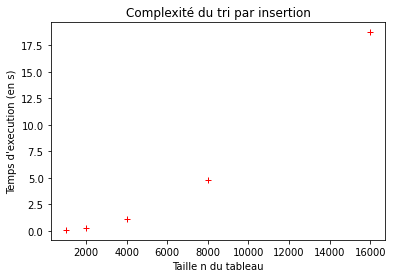

In [17]:
# On trace les nuages de points
import matplotlib.pyplot as plt

plt.figure("Complexite temporelle")
plt.title('Complexité du tri par insertion')
plt.xlabel("Taille n du tableau")
plt.ylabel("Temps d'execution (en s)")  
plt.plot(abscisses, ordonnees, 'r+')
plt.show()

Plus généralement, le tri par insertion se comporte favorablement si le tableau est "presque trié", ce qui arrive plus souvent qu'on ne le pense avec données réalistes.

### Trier pour un ordre arbitraire
Nous avons supposé que l'on triait des tableux d'entiers (on utilisant la notion d'ordre sur les nombres), mais on pourrait tout aussi bien trié des valeurs qui ne sont pas des entiers, par exemple des chaînes de caractères (avec l'ordre léxicographique).  
On pourrait également trier des entiers autrement que par l'ordre croissant.

### Vitesse du tri
Pour trier un tableau contenant $N$ valeurs, nous avons vu que nos deux algorithmes de tri, par selection et par insertion, peuvent prendre un temps proportionnel à $N^2$ dans le pire des cas.  
Si l'on ne connaît rien quant aux valeurs à trier, notamment leur distribution, la théorie nous indique qu'il faut au moins $N \log_2 N$ comparaisons, dans le pire des cas pour trier $N$ valeurs.  
La fonction mathématique $\log_2$, appelé **logarithme de base 2** croît lentement.

In [13]:
from math import log

for nb in [10 ** i for i in range(7)]:
    print(f"Le logarithme binaire de {nb} est : {log(nb, 2)}")

Le logarithme binaire de 1 est : 0.0
Le logarithme binaire de 10 est : 3.3219280948873626
Le logarithme binaire de 100 est : 6.643856189774725
Le logarithme binaire de 1000 est : 9.965784284662087
Le logarithme binaire de 10000 est : 13.28771237954945
Le logarithme binaire de 100000 est : 16.609640474436812
Le logarithme binaire de 1000000 est : 19.931568569324174


## Les tris fournis par Python
Python fournit des fonctions pour [trier](https://docs.python.org/fr/3/howto/sorting.html?highlight=sort) des tableaux, plus efficaces que les tris par sélection et par insertion.  
Il existe deux possibilités selon que l'on veut obtenir une copie triée du tableau, sans le modifier, ou, au contraire, modifier le tableau pour le trier (comme nous l'avons fait dans les tris étudiés).

La fonction [`sorted`](https://docs.python.org/fr/3/library/functions.html?highlight=sorted#sorted) prend en argument un tableau et renvoie un **nouveau tableau** contenant les mêmes éléments.

In [14]:
t = [55, 2, 1, 34, 3, 21, 5, 8, 13, 1, 0]
print(sorted(t))
print(t)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
[55, 2, 1, 34, 3, 21, 5, 8, 13, 1, 0]


La construction [`t.sort()`](https://docs.python.org/fr/3/library/stdtypes.html?highlight=sort#list.sort), en revanche, modifie le tableau `t` pour le trier, sans rien renvoyer.

In [15]:
t = [55, 2, 1, 34, 3, 21, 5, 8, 13, 1, 0]
print(t.sort())
print(t)

None
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


Ces deux fonctions sont largement plus efficaces. Elles sont basées sur le [Tim sort](https://fr.wikipedia.org/wiki/Timsort).  

L'[implémentation](https://github.com/python/cpython/blob/master/Objects/listobject.c) est faite en [C](https://fr.wikipedia.org/wiki/CPython).

In [16]:
def tableau_aleatoire(n):
    """Renvoie un tableau d'entiers aléatoires de taille n"""
    tab = [0] * n
    for i in range(n):
        tab[i] = randint(1, n)
    return tab

273 ms ± 6.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
tab = tableau_aleatoire(1_000_000)
%timeit sorted(tab)

268 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
tab = tableau_aleatoire(1_000_000)
%timeit tab.sort()

40.9 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercices

### Exercice 1
En supposant que le tri sélection prend un temps directement proportionnel à $N^2$ ($N$ étant la taille du tabeau à trier) et qu'il prend 6,8 sec pour trier 16 000 valeurs.  
Calculer le temps qu'il faudrait pour pour trier un million de valeurs avec ce même tri.

### Exercice 2
Détailler les différentes étapes du tri par sélection sur le tableau :  

    +---+---+---+---+---+
    | 3 | 4 | 1 | 7 | 2 |
    +---+---+---+---+---+

### Exercice 3
Dans la toute dernière étape du tri par sélection, il n'y a qu'une valeur dans la partie droite et il est donc inutile d'y chercher la plus petite valeur ni de l'échanger avec elle-même.  
Modifier le programme pour éviter cette étape inutile.

### Exercice 4
Détailler les différentes étapes du tri par insertion sur le tableau :  

    +---+---+---+---+---+
    | 3 | 4 | 1 | 7 | 2 |
    +---+---+---+---+---+

### Exercice 5
Que se passe-t-il lorsque le tri par insertion est appliqué à un tableau qui se présente en ordre décroissant?

### Exercice 6
Ecrire une fonction `est_trie(t)` qui renvoie `True` si le tableau `t` est trié par ordre croissant et `False` sinon.

### Exercice 7
Au lieu de modifier le contenu du tableau pour le trier, on peut aussi renvoyer le résultat du tri dans un nouveau tableau.  
Ecrire une fonction `tri_par_insertion_externe` qui réalise cette idée avec le tri par insertion. 

### Exercice 8
Ecrire une fonction `plus_petits` qui prend en paramètres un tableau `t` et un entier `k` supposé inférieur à la longueur de `t` et qui renvoie un tableau contenant, dans l'ordre, les `k` plus petits éléments de `t`.

### Exercice 9
Ecrire une fonction qui prend en argument un tableau d'entiers *trié* et affiche son contenu sous la forme d'un histogramme, c'est-à-dire quelque chose comme : 
```
1 fois 0
2 fois 2
1 fois 3
3 fois 6
...
```

### Exercice 10
En se servant du tri par insertion, écrire une fonction qui prend en argument un tableau d'entiers et renvoie la valeur la plus fréquente dans ce tableau.

## Sources :
* Balabonski Thibaut, et al. 2019. *Spécialité Numérique et sciences informatiques : 30 leçons avec exercices corrigés - Première - Nouveaux programmes*. Paris. Ellipse
* Interstices - [Les algorithmes de tri](https://interstices.info/les-algorithmes-de-tri/)
* Inria Mecsci : grains logiciels 3.0 - [Les tris](https://jdolivet.github.io/NSI-Cours/Premi%C3%A8re/Sites/methodes-tri/)
* Data Structure Visualizations - [Algorithmes de tris](https://www.cs.usfca.edu/~galles/visualization/Search.html)  - [*University of San Francisco*](https://www.cs.usfca.edu/)